## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import cv2
from google.colab.patches import cv2_imshow

2025-04-25 08:42:25.732940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745570546.001914      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745570546.074643      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

## Loading the data

In [3]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip

--2025-04-25 08:42:57--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.27, 52.219.62.84, 52.219.160.51, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>]  27.12M  12.9MB/s    in 2.1s    

2025-04-25 08:43:00 (12.9 MB/s) - ‘data.zip’ saved [28437489/28437489]



In [5]:
def download_csv(datadir):
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img.flatten()
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return np.array(imagesData), np.array(imagesLabel)

data_dir = '/kaggle/working/data/dataset'

imagesData, imagesLabel = download_csv(data_dir)

X = np.array(imagesData)
X = X / 255.0
Y = np.array(imagesLabel)
df_X = pd.DataFrame(X)
df_X['label'] = Y
df_X.to_csv('data.csv', index=False)

In [7]:
img=cv2.imread('/kaggle/working/data/dataset/div/%_1_1.png')
cv2_imshow(img)

In [8]:
df=pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,add
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sub
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sub
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.392157,0.392157,0.392157,0.392157,0.392157,0.392157,0.392157,0.392157,0.392157,8
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8


In [9]:
imagesData = []
imagesLabel = []
data_dir = '/kaggle/working/data/dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))

Number of images:  7600
Labels: ['7', 'sub', '8', '2', '1', '3', '4', '5', '0', 'add', '6', '9', 'div', 'mul']


In [12]:
import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div']
image_count={}
for i in folders:
  folder_path = '/kaggle/working/data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')


Number of images in the folder "/kaggle/working/data/dataset/0": 595
Number of images in the folder "/kaggle/working/data/dataset/1": 562
Number of images in the folder "/kaggle/working/data/dataset/2": 433
Number of images in the folder "/kaggle/working/data/dataset/3": 541
Number of images in the folder "/kaggle/working/data/dataset/4": 526
Number of images in the folder "/kaggle/working/data/dataset/5": 433
Number of images in the folder "/kaggle/working/data/dataset/6": 581
Number of images in the folder "/kaggle/working/data/dataset/7": 533
Number of images in the folder "/kaggle/working/data/dataset/8": 554
Number of images in the folder "/kaggle/working/data/dataset/9": 546
Number of images in the folder "/kaggle/working/data/dataset/add": 596
Number of images in the folder "/kaggle/working/data/dataset/sub": 655
Number of images in the folder "/kaggle/working/data/dataset/mul": 577
Number of images in the folder "/kaggle/working/data/dataset/div": 468


In [13]:
print(sum(list(image_count.values())))

7600


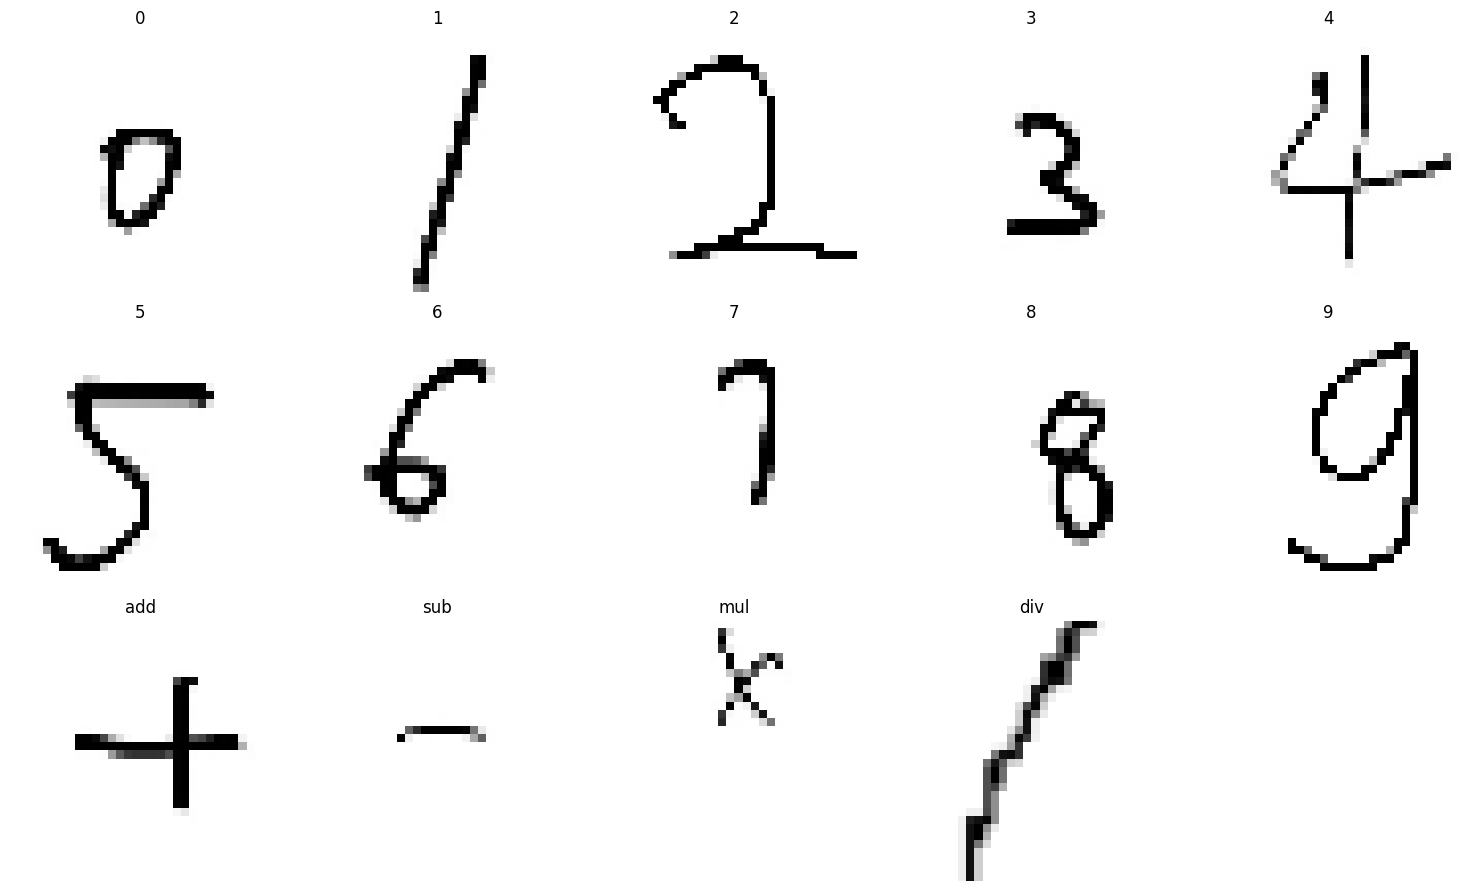

In [14]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/kaggle/working/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

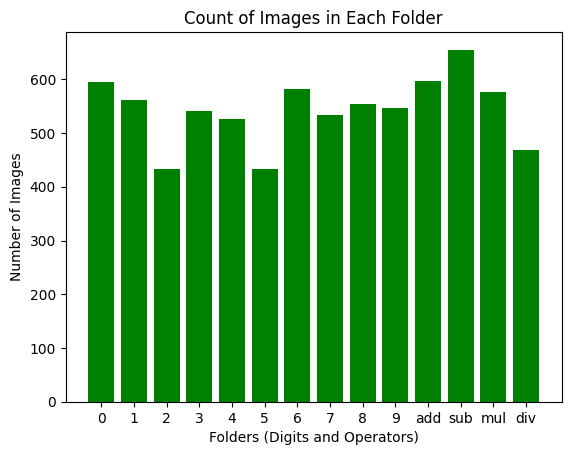

In [16]:
plt.bar(image_count.keys(), image_count.values(), color='green')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

7600


 9


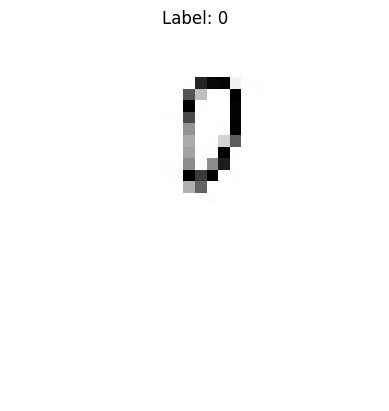

In [17]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [18]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [19]:
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'add', 11: 'div', 12: 'mul', 13: 'sub'}


In [20]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [21]:
X.shape

(7600, 32, 32)

In [22]:
X = np.expand_dims(X, axis=-1)
X.shape

(7600, 32, 32, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 6080
Testing set size: 1520


In [24]:
len(np.unique(y))

14

## CNN Model

In [25]:
cnn_model=Sequential()
cnn_model.add(Conv2D(64,(3,3),input_shape=(32,32,1),activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(14, activation='softmax'))

cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745570879.774983      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745570879.775597      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,198 (426.55 KB)

 Trainable params: 109,198 (426.55 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


I0000 00:00:1745570890.556349      96 service.cc:148] XLA service 0x7e0430005ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745570890.556952      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745570890.556971      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745570890.861129      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


 64/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.0981 - loss: 2.6363

I0000 00:00:1745570893.695430      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.1653 - loss: 2.4677 - val_acc: 0.7382 - val_loss: 0.9545
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6590 - loss: 1.0611 - val_acc: 0.7875 - val_loss: 0.6605
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7764 - loss: 0.6968 - val_acc: 0.8941 - val_loss: 0.3565
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8366 - loss: 0.5190 - val_acc: 0.9125 - val_loss: 0.2953
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8639 - loss: 0.4342 - val_acc: 0.9322 - val_loss: 0.2280
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8886 - loss: 0.3428 - val_acc: 0.9401 - val_loss: 0.2068
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9054 - loss: 0.3093 - val_acc: 0.9414 - val_loss: 0.1877
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9151 - loss: 0.2550 - val_acc: 0.9454 - val_loss: 0.1882
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9223 -

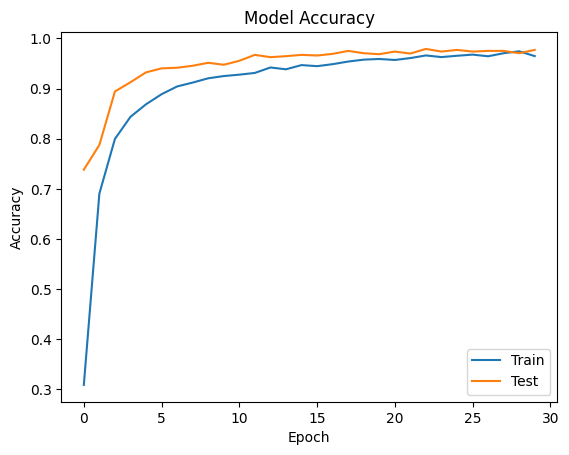

In [27]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [28]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9797 - loss: 0.0749
Test accuracy of the loaded model: 97.70%


In [29]:
loss, accuracy = cnn_model.evaluate(X,y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9913 - loss: 0.0332
Accuracy of the model: 99.38%


In [30]:
print(y.shape)

(7600,)


In [31]:
predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


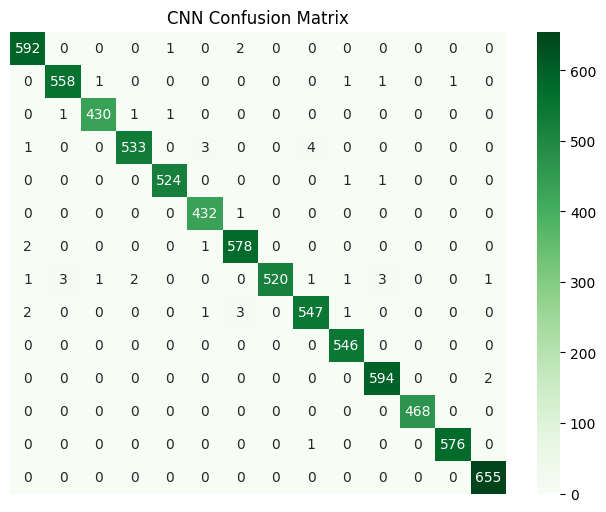

In [33]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()


In [34]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[592   0   0   0   1   0   2   0   0   0   0   0   0   0]
 [  0 558   1   0   0   0   0   0   0   1   1   0   1   0]
 [  0   1 430   1   1   0   0   0   0   0   0   0   0   0]
 [  1   0   0 533   0   3   0   0   4   0   0   0   0   0]
 [  0   0   0   0 524   0   0   0   0   1   1   0   0   0]
 [  0   0   0   0   0 432   1   0   0   0   0   0   0   0]
 [  2   0   0   0   0   1 578   0   0   0   0   0   0   0]
 [  1   3   1   2   0   0   0 520   1   1   3   0   0   1]
 [  2   0   0   0   0   1   3   0 547   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 546   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 594   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0 468   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0 576   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 655]]


In [35]:
cnn_model.save('cnn_model.h5')

In [36]:
from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


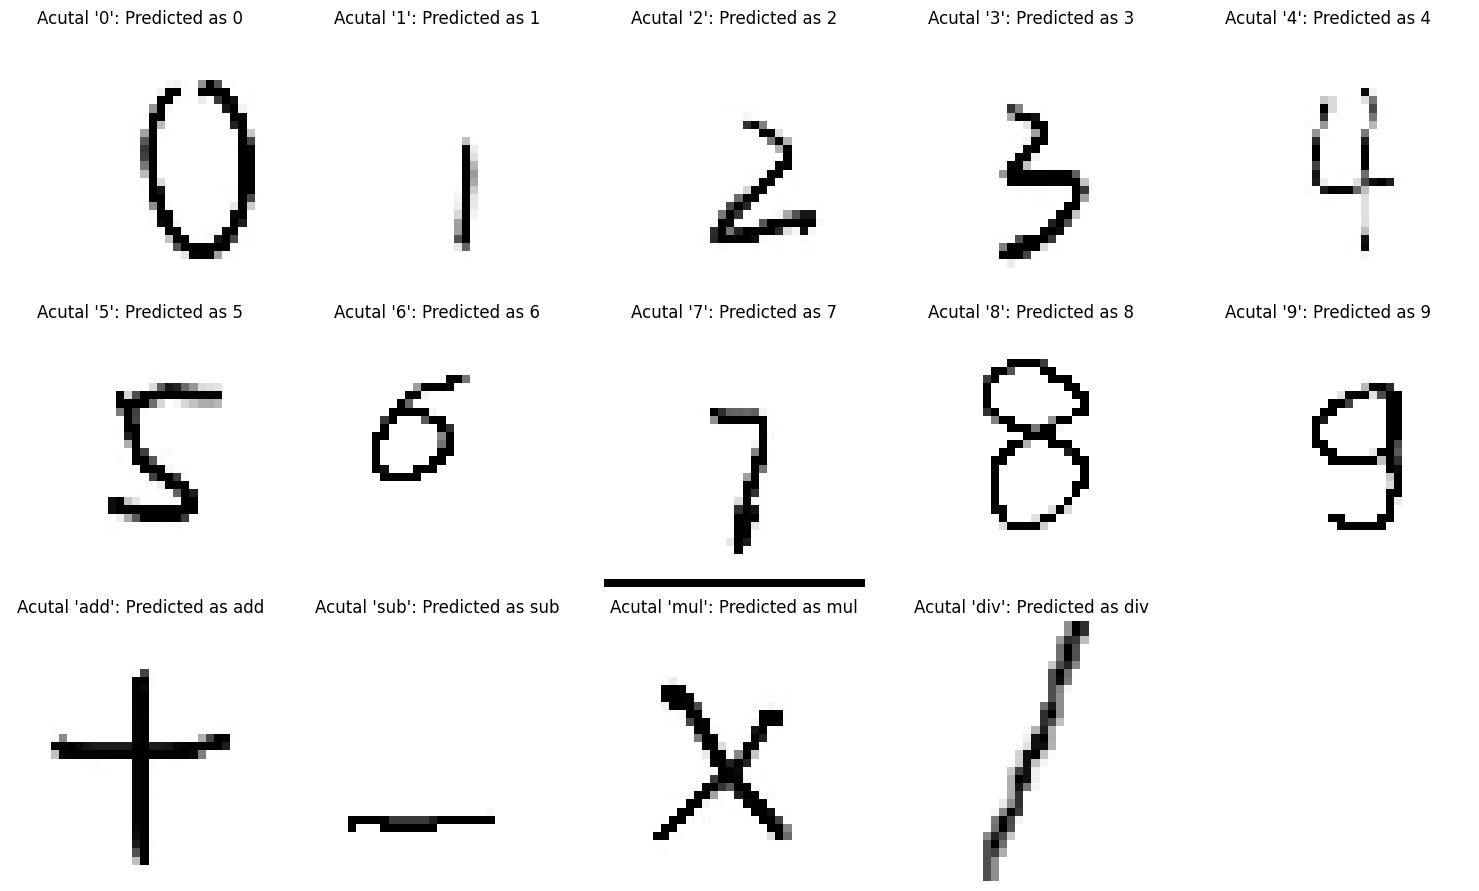

In [37]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/kaggle/working/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '/', 12: '*', 13: '-'}

model = load_model('cnn_model.h5')

def predict(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f'Predicted equation: {equation}')
    print(f'Result: {eval(equation)}')

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

# Define labels
labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 
    10: '+', 11: '/', 12: '*', 13: '-'
}

def load_model_safely(model_path='cnn_model.h5'):
    """Load the model with error handling"""
    try:
        model = load_model(model_path)
        print(f"Model loaded successfully from {model_path}")
        return model
    except Exception as e:
        print(f"Failed to load model: {e}")
        raise

def preprocess_image(image_path):
    """Enhanced preprocessing with better lighting normalization"""
    # Read image
    original_image = cv2.imread(image_path)
    if original_image is None:
        raise ValueError(f"Could not read image at {image_path}")
    
    # Convert to grayscale if it's not already
    if len(original_image.shape) == 3:
        image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    else:
        image = original_image.copy()
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    
    # Remove shadows using morphological operations
    # Create a structuring element that is the size of the image
    dilated_img = cv2.dilate(enhanced_image, np.ones((7, 7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    
    # Subtract the background from the enhanced image
    diff_img = 255 - cv2.absdiff(enhanced_image, bg_img)
    
    # Normalize the image to enhance contrast
    norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(norm_img, (5, 5), 0)
    
    # Use OTSU thresholding for better separation in varying lighting
    _, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Apply morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    
    # Display preprocessing steps (uncomment for debugging)
    # plt.figure(figsize=(15, 10))
    # plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
    # plt.subplot(232), plt.imshow(enhanced_image, cmap='gray'), plt.title('CLAHE')
    # plt.subplot(233), plt.imshow(bg_img, cmap='gray'), plt.title('Background')
    # plt.subplot(234), plt.imshow(diff_img, cmap='gray'), plt.title('Shadow Removal')
    # plt.subplot(235), plt.imshow(norm_img, cmap='gray'), plt.title('Normalized')
    # plt.subplot(236), plt.imshow(binary_image, cmap='gray'), plt.title('Binary')
    # plt.tight_layout()
    # plt.show()
    
    return norm_img, binary_image  # Return normalized image and binary image

def extract_symbols(binary_image, min_area=500, max_aspect_ratio=5):
    """Extract individual symbols from the binary image with improved filtering"""
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on multiple criteria
    filtered_contours = []
    filtered_bounding_boxes = []
    
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else float('inf')
        
        # Filter by area, aspect ratio, and min dimensions
        if (area > min_area and 
            aspect_ratio < max_aspect_ratio and 
            w > 10 and h > 10):
            filtered_contours.append(contour)
            filtered_bounding_boxes.append((x, y, w, h))
    
    if len(filtered_contours) == 0:
        print("No symbols detected in the image after filtering")
        return [], []
    
    # Sort symbols left to right
    sorted_indices = sorted(range(len(filtered_bounding_boxes)), 
                          key=lambda i: filtered_bounding_boxes[i][0])
    sorted_contours = [filtered_contours[i] for i in sorted_indices]
    sorted_bounding_boxes = [filtered_bounding_boxes[i] for i in sorted_indices]
    
    # Display all detected contours for debugging
    # debug_img = cv2.cvtColor(binary_image.copy(), cv2.COLOR_GRAY2BGR)
    # for cnt in contours:
    #     area = cv2.contourArea(cnt)
    #     x, y, w, h = cv2.boundingRect(cnt)
    #     color = (0, 255, 0) if area > min_area else (0, 0, 255)
    #     cv2.rectangle(debug_img, (x, y), (x+w, y+h), color, 2)
    #     cv2.putText(debug_img, f"{area:.0f}", (x, y-5), 
    #                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    # plt.figure(figsize=(10, 10))
    # plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
    # plt.title(f"All contours: {len(contours)}, Filtered: {len(filtered_contours)}")
    # plt.show()
    
    return sorted_contours, sorted_bounding_boxes

def cluster_symbols_by_y_position(bounding_boxes, vertical_tolerance=0.2):
    """Group symbols into horizontal lines based on their y-positions"""
    if not bounding_boxes:
        return {}
    
    # Calculate the y-center of each bounding box
    y_centers = [(i, y + h/2) for i, (_, y, _, h) in enumerate(bounding_boxes)]
    
    # Sort by y-center
    y_centers.sort(key=lambda x: x[1])
    
    # Calculate average symbol height
    heights = [h for _, _, _, h in bounding_boxes]
    avg_height = sum(heights) / len(heights)
    threshold = avg_height * vertical_tolerance
    
    # Cluster symbols by y-position
    clusters = []
    current_cluster = [y_centers[0][0]]
    current_y = y_centers[0][1]
    
    for i, y in y_centers[1:]:
        if abs(y - current_y) < threshold:
            # Add to current cluster if y is similar
            current_cluster.append(i)
        else:
            # Start a new cluster
            clusters.append(current_cluster)
            current_cluster = [i]
            current_y = y
    
    # Add the last cluster
    if current_cluster:
        clusters.append(current_cluster)
    
    # Sort indices within each cluster by x-position (left to right)
    result = {}
    for idx, cluster in enumerate(clusters):
        # Sort each cluster by x-position
        result[idx] = sorted(cluster, key=lambda i: bounding_boxes[i][0])
    
    return result

def are_symbols_aligned(bounding_boxes, height_threshold=0.5, y_threshold=0.5):
    """Filter symbols by checking if they're roughly aligned horizontally"""
    if not bounding_boxes:
        return []
    
    # Get the average height of all symbols
    heights = [h for _, _, _, h in bounding_boxes]
    avg_height = sum(heights) / len(heights)
    
    # Get the median y-coordinate
    y_centers = [y + h/2 for y, _, _, h in bounding_boxes]
    median_y = sorted(y_centers)[len(y_centers)//2]
    
    # Filter symbols that are aligned with the median y-coordinate
    aligned_indices = []
    for i, (_, y, _, h) in enumerate(bounding_boxes):
        y_center = y + h/2
        # Check if symbol is close to the median y-coordinate
        if abs(y_center - median_y) < avg_height * y_threshold:
            aligned_indices.append(i)
    
    return aligned_indices

def prepare_rois(image, contours, bounding_boxes, padding=15):
    """Extract and prepare regions of interest (ROIs) for prediction"""
    rois = []
    
    for i, contour in enumerate(contours):
        x, y, w, h = bounding_boxes[i]
        
        # Add padding around the symbol
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)
        
        # Extract ROI
        roi = image[y_start:y_end, x_start:x_end]
        
        # Resize to model input size
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)
    
    # Convert to numpy array and normalize
    if rois:
        rois = np.array(rois)
        rois = rois / 255.0
        rois = np.expand_dims(rois, axis=-1)
    
    return rois

def predict_symbols(model, rois, confidence_threshold=0.5):
    """Predict symbols from ROIs with confidence filtering"""
    if len(rois) == 0:
        return [], []
    
    try:
        predictions = model.predict(rois)
        max_confidences = np.max(predictions, axis=1)
        predicted_labels = np.argmax(predictions, axis=1)
        
        # Filter by confidence if threshold is provided
        if confidence_threshold > 0:
            confident_indices = np.where(max_confidences >= confidence_threshold)[0]
            confident_labels = predicted_labels[confident_indices]
            return confident_labels, confident_indices
        else:
            return predicted_labels, list(range(len(predicted_labels)))
    except Exception as e:
        print(f"Error during prediction: {e}")
        raise

def form_equation(predicted_labels):
    """Form the equation string from predicted labels"""
    equation = ''.join(labels[label] for label in predicted_labels)
    return equation

def evaluate_equation(equation):
    """Safely evaluate the equation"""
    try:
        # Basic validation
        if not equation or len(equation) < 3:
            return "Invalid equation"
        
        # Check for valid operators
        if not any(op in equation for op in ['+', '-', '*', '/']):
            return "No valid operators in equation"
        
        result = eval(equation)
        return result
    except Exception as e:
        print(f"Could not evaluate equation '{equation}': {e}")
        return "Error evaluating equation"

def visualize_results(original_image, contours, bounding_boxes, predicted_labels, confident_indices=None):
    """Visualize the detection results"""
    # Convert grayscale to color for visualization if needed
    if len(original_image.shape) == 2:
        image_color = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
    else:
        image_color = original_image.copy()
    
    # Draw bounding boxes and labels
    for i, (contour, bbox) in enumerate(zip(contours, bounding_boxes)):
        if i >= len(predicted_labels):
            break
            
        x, y, w, h = bbox
        label = labels[predicted_labels[i]]
        
        # Use different colors for confident vs non-confident symbols
        color = (0, 255, 0)  # Green for confident
        if confident_indices is not None and i not in confident_indices:
            color = (0, 0, 255)  # Red for non-confident
        
        # Draw rectangle around symbol
        cv2.rectangle(image_color, (x, y), (x+w, y+h), color, 2)
        
        # Add label text
        cv2.putText(image_color, label, (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detected {len(contours)} symbols, {len(confident_indices) if confident_indices else 0} confident")
    plt.show()

def predict(image_path, model_path='cnn_model.h5', min_area=500, confidence_threshold=0.7):
    """Main function to predict an equation from an image"""
    try:
        # Load model
        model = load_model_safely(model_path)
        
        # Preprocess image
        normalized_image, binary_image = preprocess_image(image_path)
        
        # Save preprocessed images for debugging
        # cv2.imwrite('normalized.jpg', normalized_image)
        # cv2.imwrite('binary.jpg', binary_image)
        
        # Extract symbols
        contours, bounding_boxes = extract_symbols(binary_image, min_area=min_area)
        
        if not contours:
            return "No symbols detected", None
        
        # Group symbols into horizontal lines
        clusters = cluster_symbols_by_y_position(bounding_boxes)
        
        # If no clusters, use alignment method as fallback
        if not clusters:
            aligned_indices = are_symbols_aligned(bounding_boxes)
            if aligned_indices:
                contours = [contours[i] for i in aligned_indices]
                bounding_boxes = [bounding_boxes[i] for i in aligned_indices]
        else:
            # Find the cluster with the most symbols (likely the main equation)
            main_cluster_idx = max(clusters.keys(), key=lambda k: len(clusters[k]))
            main_cluster = clusters[main_cluster_idx]
            
            # Use only symbols from the main cluster
            contours = [contours[i] for i in main_cluster]
            bounding_boxes = [bounding_boxes[i] for i in main_cluster]
        
        # Prepare ROIs for prediction
        rois = prepare_rois(normalized_image, contours, bounding_boxes)
        
        # Predict symbols with confidence
        predicted_labels, confident_indices = predict_symbols(model, rois, confidence_threshold)
        
        if len(predicted_labels) == 0:
            return "No symbols detected with sufficient confidence", None
        
        # Form equation using only confident predictions
        equation = form_equation(predicted_labels)
        
        # Evaluate equation
        result = evaluate_equation(equation)
        
        # Visualize results
        visualize_results(normalized_image, contours, bounding_boxes, 
                         predict_symbols(model, rois)[0], 
                         confident_indices)
        
        # Print results
        print(f'Predicted equation: {equation}')
        print(f'Result: {result}')
        
        return equation, result
        
    except Exception as e:
        print(f"Error processing image: {e}")
        import traceback
        traceback.print_exc()
        return f"Error: {str(e)}", None

Model loaded successfully from cnn_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


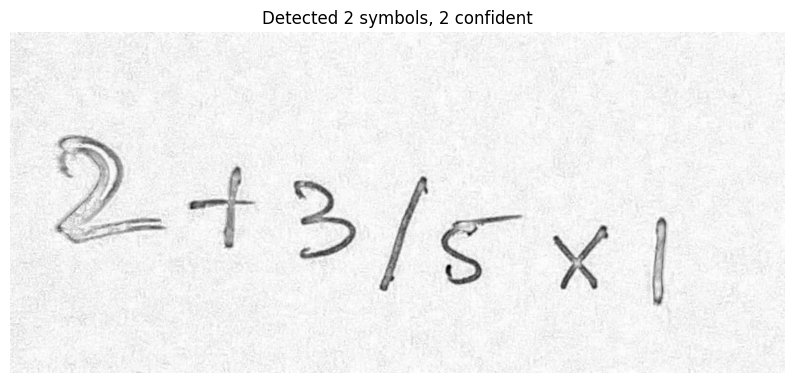

Predicted equation: 17
Result: Invalid equation
17
Invalid equation


In [66]:
image_path = "/kaggle/input/example-eq/example_eq.jpg"  # Replace with your image path
equation, result = predict(image_path, confidence_threshold=0)
print(equation)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


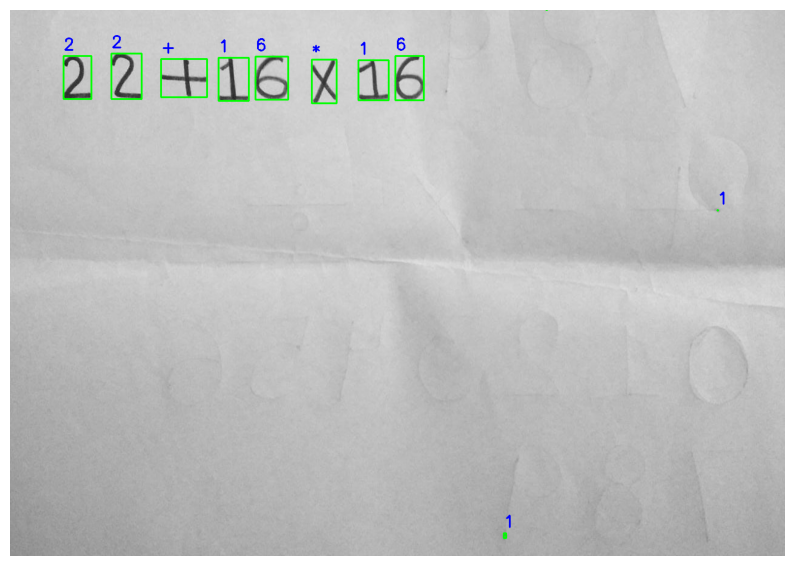

Predicted equation: 22+16*16111
Result: 257798


In [48]:
predict('/kaggle/working/data/test_equation4.jpg')

## RNN model

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(32, 32), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(14, activation='softmax'))

rnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_48 (SimpleRNN)   (None, 32, 64)            6208      
                                                                 
 simple_rnn_49 (SimpleRNN)   (None, 32, 64)            8256      
                                                                 
 simple_rnn_50 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 14)              

In [ ]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
190/190 [==============================] - 10s 29ms/step - loss: 2.5937 - acc: 0.1104 - val_loss: 2.4177 - val_acc: 0.1632
Epoch 2/30
190/190 [==============================] - 6s 30ms/step - loss: 2.3089 - acc: 0.2044 - val_loss: 2.1401 - val_acc: 0.2809
Epoch 3/30
190/190 [==============================] - 5s 29ms/step - loss: 2.0693 - acc: 0.2757 - val_loss: 1.8304 - val_acc: 0.3651
Epoch 4/30
190/190 [==============================] - 5s 24ms/step - loss: 1.8540 - acc: 0.3433 - val_loss: 1.7100 - val_acc: 0.3875
Epoch 5/30
190/190 [==============================] - 6s 34ms/step - loss: 1.7172 - acc: 0.3964 - val_loss: 1.5053 - val_acc: 0.4408
Epoch 6/30
190/190 [==============================] - 5s 25ms/step - loss: 1.5748 - acc: 0.4400 - val_loss: 1.4741 - val_acc: 0.4572
Epoch 7/30
190/190 [==============================] - 5s 25ms/step - loss: 1.4843 - acc: 0.4798 - val_loss: 1.4243 - val_acc: 0.5072
Epoch 8/30
190/190 [==============================] - 7s 35ms/step -

In [ ]:
rnn_model.save('rnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


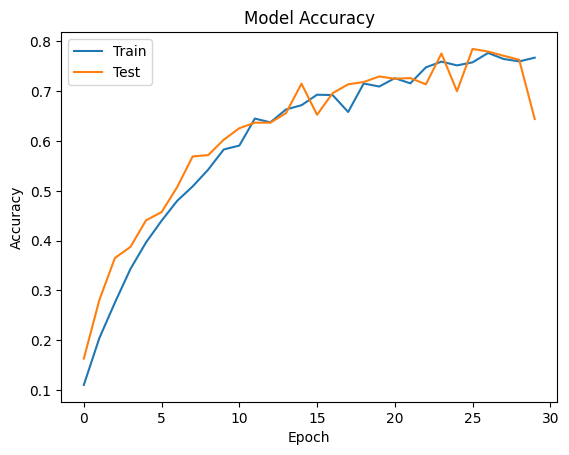

In [ ]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

238/238 [==============================] - 2s 9ms/step


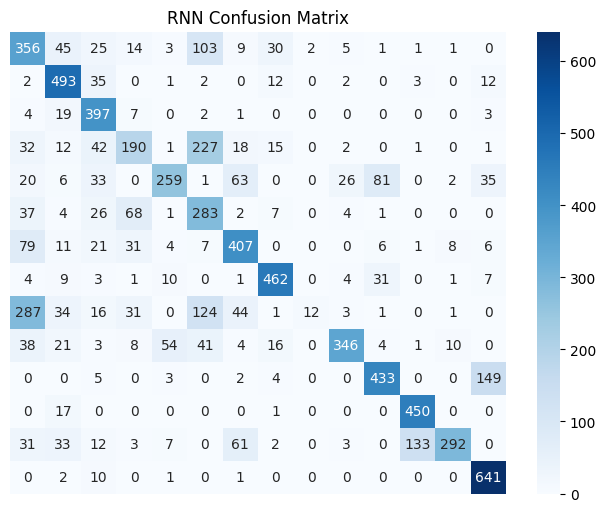

In [ ]:
predictions = rnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Confusion Matrix")
plt.axis('off')
plt.show()

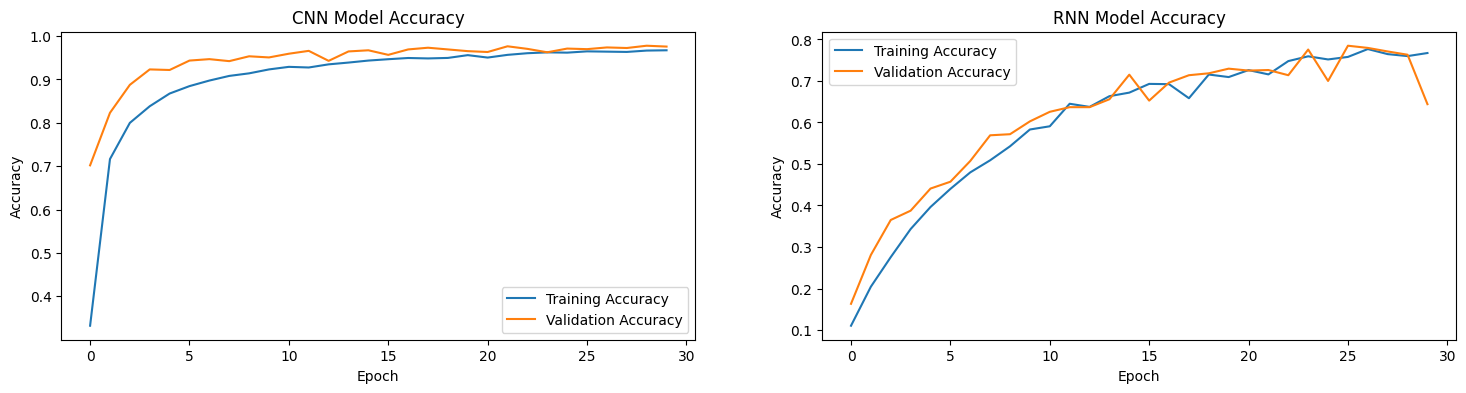

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

axes[0].plot(cnn_history.history['acc'], label='Training Accuracy')
axes[0].plot(cnn_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[1].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('RNN Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()


## Conclusion

In conclusion, the handwritten equation solver utilizing deep learning techniques, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), has demonstrated promising accuracy levels. The CNN-based approach achieved an impressive accuracy of 97.57%, while the RNN-based method achieved a respectable accuracy of 76.32%.

The CNN model excelled in accurately recognizing and classifying individual handwritten characters within the equations. Its ability to effectively capture spatial hierarchies and local patterns in the input images contributed to its high accuracy. With its deep layers and convolutional operations, the CNN was capable of learning complex features directly from the pixel values, enabling robust classification of handwritten characters.